<a href="https://colab.research.google.com/github/basakstuff/HAR-using-Smartphones/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/DataMining

/content/drive/MyDrive/Colab Notebooks/DataMining


In [40]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# To gbm light
from lightgbm import LGBMClassifier

# To measure time
import time

#Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD,Adam

In [4]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Combine boths dataframes
train['Data'] = 'Train'
test['Data'] = 'Test'
both_df = pd.concat([train, test], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# Create label
label = both_df.pop('Activity')

print('Train:\t{}'.format(train.shape))
print('Test:\t{}\n'.format(test.shape))



Train:	(7352, 564)
Test:	(2947, 564)



# Visu

In [5]:
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  Activity   Data
0           0.288585          -0.020294  ...  STANDING  Train
1           0.278419          -0.016411  ...  STANDING  Train
2           0.279653          -0.019467  ...  STANDING  Train
3           0.279174          -0.026201  ...  STANDING  Train
4           0.276629          -0.016570  ...  STANDING  Train

[5 rows x 564 columns]

In [6]:
test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  Activity  Data
0           0.257178          -0.023285  ...  STANDING  Test
1           0.286027          -0.013163  ...  STANDING  Test
2           0.275485          -0.026050  ...  STANDING  Test
3           0.270298          -0.032614  ...  STANDING  Test
4           0.274833          -0.027848  ...  STANDING  Test

[5 rows x 564 columns]

In [7]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

count
fBodyAcc                 79
fBodyGyro                79
fBodyAccJerk             79
tGravityAcc              40
tBodyAcc                 40
tBodyGyroJerk            40
tBodyGyro                40
tBodyAccJerk             40
tBodyAccMag              13
tGravityAccMag           13
tBodyAccJerkMag          13
tBodyGyroMag             13
tBodyGyroJerkMag         13
fBodyAccMag              13
fBodyBodyAccJerkMag      13
fBodyBodyGyroMag         13
fBodyBodyGyroJerkMag     13
angle                     7
subject                   1
Data                      1

In [8]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


In [9]:
train.describe()  #we see that the min = -1 and the max = +1. so no need for scaling

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  angle(Z,gravityMean)      subject
count        7352.000000        7352.000000  ...           7352.000000  7352.000000
mean            0.274488          -0.017695  ...             -0.056515    17.413085
std             0.070261           0.040811  ...              0.279122     8.975143
min            -1.000000          -1.000000  ...             -1.000000     1.000000
25%             0.262975          -0.024863  ...             -0.143414     8.000000
50%             0.277193          -0.017219  ...              0.003181    19.000000
75%             0.288461          -0.010783  ...              0.107659    26.000000
max             1.000000           1.000000  ...              1.000000    30.000000

[8 rows x 562 columns]

In [10]:
test.describe()  #we see that the min = -1 and the max = +1. so no need for scaling

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  angle(Z,gravityMean)      subject
count        2947.000000        2947.000000  ...           2947.000000  2947.000000
mean            0.273996          -0.017863  ...             -0.048720    12.986427
std             0.060570           0.025745  ...              0.241467     6.950984
min            -0.592004          -0.362884  ...             -0.949228     2.000000
25%             0.262075          -0.024961  ...             -0.098485     9.000000
50%             0.277113          -0.016967  ...             -0.010671    12.000000
75%             0.288097          -0.010143  ...              0.092373    18.000000
max             0.671887           0.246106  ...              0.973113    24.000000

[8 rows x 562 columns]

In [11]:
# Plotting data
label_counts = label.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

plt = go.Figure(data=[data], layout=layout)
plt.show()

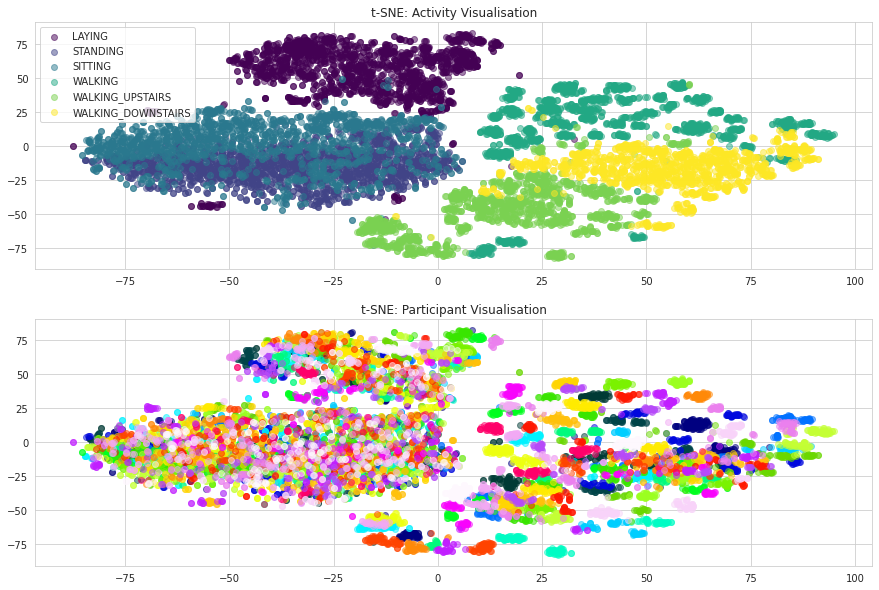

In [26]:
# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('t-SNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('t-SNE: Participant Visualisation')
plt.show()

In [14]:
feature_cols = train.columns[: -1]   #exclude the Activity column
#Calculate the correlation values
correlated_values = train[feature_cols].corr()
#stack the data and convert to a dataframe

correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values.head()

Feature_1          Feature_2  Correlations
0  tBodyAcc-mean()-X  tBodyAcc-mean()-X      1.000000
1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y      0.148061
2  tBodyAcc-mean()-X  tBodyAcc-mean()-Z     -0.256952
3  tBodyAcc-mean()-X   tBodyAcc-std()-X      0.000619
4  tBodyAcc-mean()-X   tBodyAcc-std()-Y     -0.021903

In [15]:
#create an abs_correlation column
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()

Feature_1          Feature_2  Correlations  abs_correlation
0  tBodyAcc-mean()-X  tBodyAcc-mean()-X      1.000000         1.000000
1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y      0.148061         0.148061
2  tBodyAcc-mean()-X  tBodyAcc-mean()-Z     -0.256952         0.256952
3  tBodyAcc-mean()-X   tBodyAcc-std()-X      0.000619         0.000619
4  tBodyAcc-mean()-X   tBodyAcc-std()-Y     -0.021903         0.021903

In [16]:
#Picking most correlated features
train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
train_fields.sample(5)

Feature_1  ... abs_correlation
160916          fBodyAcc-iqr()-Z  ...        0.838081
58174   tBodyAccJerk-entropy()-Y  ...        0.981976
9783         tBodyAcc-energy()-Y  ...        0.832962
11213           tBodyAcc-iqr()-X  ...        0.827267
162519      fBodyAcc-entropy()-Z  ...        0.900380

[5 rows x 4 columns]

In [17]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

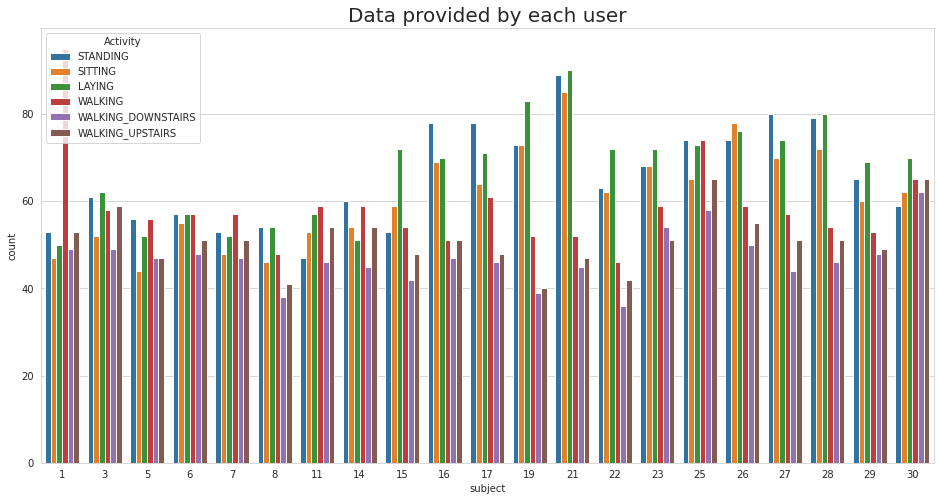

In [18]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

# Test

In [5]:
peek=train.head()
print(peek)
print(train.Activity.value_counts()) # counting activities
print(train.shape)
print(test.shape)

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  Activity   Data
0           0.288585          -0.020294  ...  STANDING  Train
1           0.278419          -0.016411  ...  STANDING  Train
2           0.279653          -0.019467  ...  STANDING  Train
3           0.279174          -0.026201  ...  STANDING  Train
4           0.276629          -0.016570  ...  STANDING  Train

[5 rows x 564 columns]
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64
(7352, 564)
(2947, 564)


In [6]:
#shuffling data

test =shuffle(test) # ruin the sequence data
train=shuffle(train)
print(train.head())

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...          Activity   Data
6359           0.287073          -0.014985  ...            LAYING  Train
5312           0.276629          -0.008838  ...           SITTING  Train
1901           0.320504          -0.096271  ...  WALKING_UPSTAIRS  Train
1161           0.273590          -0.033010  ...          STANDING  Train
1758           0.256846          -0.046044  ...          STANDING  Train

[5 rows x 564 columns]


In [7]:
test.shape

(2947, 564)

In [8]:
#Separate Input and Output Labels
# dropping Activity and subject
trainData = train.drop(['Activity','subject','Data'], axis=1).values
trainLabel = train.Activity.values

testData = test.drop(['Activity','subject', 'Data'], axis=1).values
testLabel = test.Activity.values

In [9]:
testData.shape

(2947, 561)

In [10]:
#encoding Labels

encoder = LabelEncoder()

In [11]:
#encoding test labels

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

In [12]:
#encoding train labels

encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)


## Classification Models

### Decision Tree
### SVM
### Neural Network
### Random Forest
### Gradient Boosting Method
### DNN
### Autoencoder

## Logistic Regression

In [13]:
# Logistic Regression
start = time.time()
model = LogisticRegression(C=0.1,solver='lbfgs', max_iter=100000)

print(model)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [14]:
model.fit(trainData,trainLabelE)



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
LogisticReg_Score=model.score(testData,testLabelE)
print(LogisticReg_Score)  # 0.95
end = time.time()
total_time =end-start
print('Time of Logistic Regression %.4f' % total_time)

0.9555480149304377
Time of Logistic Regression 26.3768


### GridSearch for Logistic Regressor C parameter

In [22]:

c_values = [0.3, 0.5, 0.7, 0.9, 1.0]
param_grid = dict(C=c_values)
model = LogisticRegression(solver='lbfgs', max_iter=2000)
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(trainData, trainLabel)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



KeyboardInterrupt: ignored

### try PCA and LDA for Logistic Regression

In [23]:



start = time.time()
pca= PCA(0.9) # capture the %85 of the variance
pca.fit(trainData)
Reduced_trainData=pca.transform(trainData)
Reduced_testData=pca.transform(testData) # use the same transform for test

model.fit(Reduced_trainData,trainLabelE)
PCA_Score=model.score(Reduced_testData,testLabelE)
print("PCA Score:%f" %(PCA_Score)) #worse performance but train faster
end = time.time()
total_time =end-start
print('Time of PCA %.4f' % total_time)

start = time.time()
LDA=LinearDiscriminantAnalysis()
LDA.fit(trainData,trainLabelE)
LDA_traindata=LDA.transform(trainData)
LDA_testdata=LDA.transform(testData)
model.fit(LDA_traindata,trainLabelE)
lda_score=model.score(LDA_testdata,testLabelE)
print("LDA Score:%f" %(lda_score)) #worse performance but train faster
end = time.time()
total_time =end-start
print('Time of LDA %.4f' % total_time)

PCA Score:0.915168
Time of PCA 3.6007
LDA Score:0.964710
Time of LDA 3.6201


In [24]:
# Scale Features

scaler = MinMaxScaler()
scaler.fit(LDA_traindata)
Scaled_trainData = scaler.transform(LDA_traindata)
Scaled_testData = scaler.transform(LDA_testdata)

model.fit(Scaled_trainData,trainLabelE)
Scaled_Score=model.score(Scaled_testData,testLabelE)
print("Scaled Data Score:%f" %(Scaled_Score)) #0.947

Scaled Data Score:0.962335


### appylying supervised neural network using multi-layer perceptron

In [25]:


mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,) \
                        , max_iter=1000, alpha=1e-4  \
                        , solver='sgd' ,verbose=10   \
                        , tol=1e-19    , random_state =1 \
                        , learning_rate_init=.001)

mlpADAM  =  nn.MLPClassifier(hidden_layer_sizes=(90,) \
                        , max_iter=1000, alpha=1e-4  \
                        , solver='adam' ,verbose=10   \
                        , tol=1e-19    , random_state =1 \
                        , learning_rate_init=.001)

nnModelADAM = mlpADAM.fit(Scaled_trainData, trainLabelE)

predicted = nnModelADAM.predict(Scaled_testData)
matrix = confusion_matrix(testLabelE, predicted)
print(matrix)
print(nnModelADAM.score(Scaled_testData,testLabelE))

Iteration 1, loss = 1.67193010
Iteration 2, loss = 1.45236019
Iteration 3, loss = 1.23041175
Iteration 4, loss = 1.00327101
Iteration 5, loss = 0.79319646
Iteration 6, loss = 0.61872571
Iteration 7, loss = 0.48349977
Iteration 8, loss = 0.38216088
Iteration 9, loss = 0.30705033
Iteration 10, loss = 0.25068293
Iteration 11, loss = 0.20823219
Iteration 12, loss = 0.17615883
Iteration 13, loss = 0.15167240
Iteration 14, loss = 0.13303621
Iteration 15, loss = 0.11787285
Iteration 16, loss = 0.10579640
Iteration 17, loss = 0.09599088
Iteration 18, loss = 0.08819475
Iteration 19, loss = 0.08178850
Iteration 20, loss = 0.07647645
Iteration 21, loss = 0.07209414
Iteration 22, loss = 0.06825276
Iteration 23, loss = 0.06521479
Iteration 24, loss = 0.06234782
Iteration 25, loss = 0.05999033
Iteration 26, loss = 0.05791864
Iteration 27, loss = 0.05608203
Iteration 28, loss = 0.05451321
Iteration 29, loss = 0.05345694
Iteration 30, loss = 0.05189170
Iteration 31, loss = 0.05063662
Iteration 32, los

## Keras Neural Network

In [26]:

n_input = Scaled_trainData.shape[1] # number of features
n_output = 6 # number of possible labels
n_samples =  Scaled_trainData.shape[0] # number of training samples
n_hidden_units = 40
Y_test=to_categorical(testLabelE) # one-hot encoded labels
Y_train=to_categorical(trainLabelE)

def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,input_dim=n_input,activation="relu"))
    model.add(Dense(n_hidden_units,input_dim=n_input,activation="relu"))
    model.add(Dense(n_output,activation="softmax"))
    # Compile Model
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(Scaled_trainData,Y_train)
print("Keras Classifier Score:{}".format(estimator.score(Scaled_testData,Y_test))) # 0.95


Keras Classifier Score:0.9494401216506958


## Ensemble Methods

In [27]:
Y_test=to_categorical(testLabelE) # one-hot encoded labels
Y_train=to_categorical(trainLabelE)

model=ExtraTreesClassifier(n_estimators=500)
model.fit(Scaled_trainData,Y_train)
print("ExtraTree Classifier results %.3f" %model.score(Scaled_testData,Y_test)) # 0.915

model=RandomForestClassifier(n_estimators=500)
model.fit(Scaled_trainData,Y_train)
print("RandomForest Classifier results %.3f" %model.score(Scaled_testData,Y_test)) # 0.90


ExtraTree Classifier results 0.959
RandomForest Classifier results 0.959


### Knearest Neighbors

In [28]:
clf= KNeighborsClassifier(n_neighbors=12)
knnModel = clf.fit(Scaled_trainData,trainLabelE)
y_te_pred = clf.predict(Scaled_testData)

acc = accuracy_score(testLabelE,y_te_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc)) #.907

K-Nearest Neighbors Accuracy: 0.96403


#### Keras model with different optimizers and dropout layers

In [31]:
Y_test=to_categorical(testLabelE) # one-hot encoded labels
Y_train=to_categorical(trainLabelE)

model = Sequential()
model.add(Dense(64, input_dim=Scaled_trainData.shape[1], activation="relu"))
model.add(Dropout(0.5)) # To avoid overfitting
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

sgd = SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])
model.fit(Scaled_trainData,Y_train, epochs=30,batch_size=128)
score = model.evaluate(Scaled_testData,Y_test,batch_size=128)
print(score)  # 0.956


Epoch 1/30
58/58 [==============================] - 1s 2ms/step - loss: 1.7583 - accuracy: 0.2414
Epoch 2/30
58/58 [==============================] - 0s 2ms/step - loss: 1.4926 - accuracy: 0.5054
Epoch 3/30
58/58 [==============================] - 0s 2ms/step - loss: 1.1367 - accuracy: 0.6388
Epoch 4/30
58/58 [==============================] - 0s 2ms/step - loss: 0.8203 - accuracy: 0.7502
Epoch 5/30
58/58 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.8101
Epoch 6/30
58/58 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8566
Epoch 7/30
58/58 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8872
Epoch 8/30
58/58 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.9005
Epoch 9/30
58/58 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.9170
Epoch 10/30
58/58 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9251
Epoch 11/30
58/58 [

In [33]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(Scaled_trainData,Y_train,epochs=30,batch_size=128)
score = model.evaluate(Scaled_testData,Y_test,batch_size=128)
print(score)  # 0.95

Epoch 1/30
58/58 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9685
Epoch 2/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9679
Epoch 3/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9704
Epoch 4/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9721
Epoch 5/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9776
Epoch 6/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9729
Epoch 7/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9789
Epoch 8/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9739
Epoch 9/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9761
Epoch 10/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9779
Epoch 11/30
58/58 [

### Feature Selection and SVM

In [34]:

model = SVC(kernel="linear")
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(Scaled_trainData, trainLabelE)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

best_features =[]
for ix,val in enumerate(rfe.support_):
    if val==True:
        best_features.append(testData[:,ix])

Num Features: 3
Selected Features: [False  True  True  True False]
Feature Ranking: [3 1 1 1 2]


## Ploting Confusion Matrix

In [41]:
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Accuracy: 0.851035
Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  0 387 104   0   0   0]
 [  0  79 453   0   0   0]
 [  0   0   0 457  22  17]
 [  0   0   0  24 347  49]
 [  0   0   0  83  61 327]]


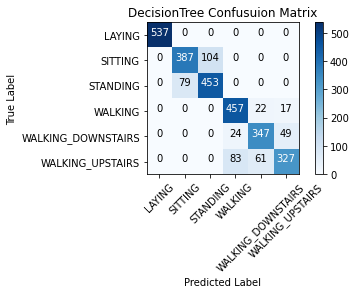

In [42]:
decsnTreeClf = DecisionTreeClassifier(criterion='entropy')
tree= decsnTreeClf.fit(trainData,trainLabelE)
testPred = tree.predict(testData)

acc= accuracy_score(testLabelE,testPred)
cfs=confusion_matrix(testLabelE,testPred)



print("Accuracy: %f" %acc)

plt.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="DecisionTree Confusuion Matrix")

### Multiple Classifier Evaluation

In [45]:
# Standardize the dataset
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(C=100,solver='lbfgs', max_iter=100000))])))
pipelines.append(('QDA', Pipeline([('Scaler', StandardScaler()),('LDA',
QuadraticDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier(7))])))
pipelines.append(('D.Tree', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=100,kernel='rbf',decision_function_shape='ovo' ))])))
results = []
names = []
for name, model in pipelines:
    model.fit(trainData,trainLabelE)
    y_pred = model.predict(LDA_testdata)
    results.append(accuracy_score(y_pred,testLabelE))
    names.append(name)
    msg = "%s: %f" % (name, accuracy_score(y_pred,testLabelE))
    print(msg)

ValueError: ignored

Empty DataFrame
Columns: [Scores]
Index: []


IndexError: ignored

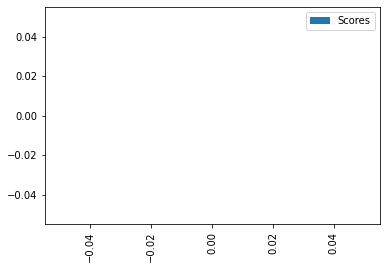

In [46]:
score_df = pd.DataFrame({'Model':names,'Scores':results}).set_index('Model')
print(score_df)
ax=score_df.plot.bar()
ax.set_xticklabels(score_df.index,rotation=45,fontsize=10)
plt.grid(True)

In [ ]:
scaler = StandardScaler().fit(trainData)
rescaledX = scaler.transform(trainData)
c_values = [0.1, 1.0, 100, 1000]
kernel_values = ['linear', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=5, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, trainLabelE)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

